In [184]:
import numpy as np
import pandas as pd

In [186]:
data = pd.read_csv("spam.csv")

In [190]:
data

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will Ì_ b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...


## DATA CLEANING

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   spamORham   5572 non-null   object
 2   Message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [195]:
data.isnull().sum()

Unnamed: 0    0
spamORham     0
Message       0
dtype: int64

In [197]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.head()

,spamORham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [199]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [201]:
data['spamORham'] = encoder.fit_transform(data['spamORham'])

In [203]:
data.head()

,spamORham,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [205]:
data.duplicated().sum()

403

In [207]:
data = data.drop_duplicates(keep = 'first')
data.duplicated().sum()

0

## EDA

In [210]:
data['spamORham'].value_counts()

spamORham
0    4516
1     653
Name: count, dtype: int64

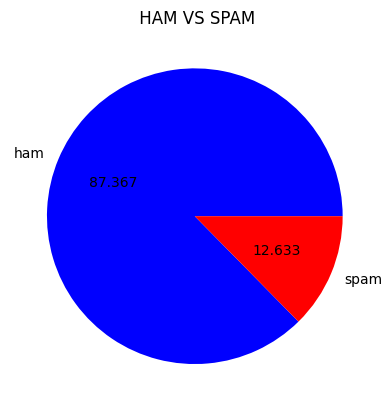

In [212]:
import matplotlib.pyplot as plt
plt.pie(data["spamORham"].value_counts(), labels = ["ham","spam"], autopct = "%0.3f", colors = ["blue", "red"])
plt.title(" HAM VS SPAM")
plt.show()  

In [214]:
#!pip install nltk

In [216]:
#!python.exe -m pip install --upgrade pip

#!pip show nltk

In [219]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [221]:
data['num_charaplha'] = data["Message"].apply(len)
data.head()

C:\Users\vivek\AppData\Local\Temp\ipykernel_7264\2507499291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_charaplha'] = data["Message"].apply(len)


,spamORham,Message,num_charaplha
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [223]:
data.loc[ :,'num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\vivek\AppData\Local\Temp\ipykernel_7264\127116419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ :,'num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [224]:
data.head()

,spamORham,Message,num_charaplha,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [227]:
data.loc[ :,'num_sent'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\vivek\AppData\Local\Temp\ipykernel_7264\3128058545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ :,'num_sent'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [229]:
data.head()

,spamORham,Message,num_charaplha,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [231]:
data[['num_charaplha', 'num_words', 'num_sent']].describe()

,num_charaplha,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [233]:
##for ham
data[data['spamORham']==0][['num_charaplha', 'num_words', 'num_sent']].describe()

,num_charaplha,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [235]:
## for spam
data[data['spamORham']==1][['num_charaplha', 'num_words', 'num_sent']].describe()

,num_charaplha,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## DATA VISUALIZATION

In [238]:
import seaborn as sns

<Axes: xlabel='num_charaplha', ylabel='Count'>

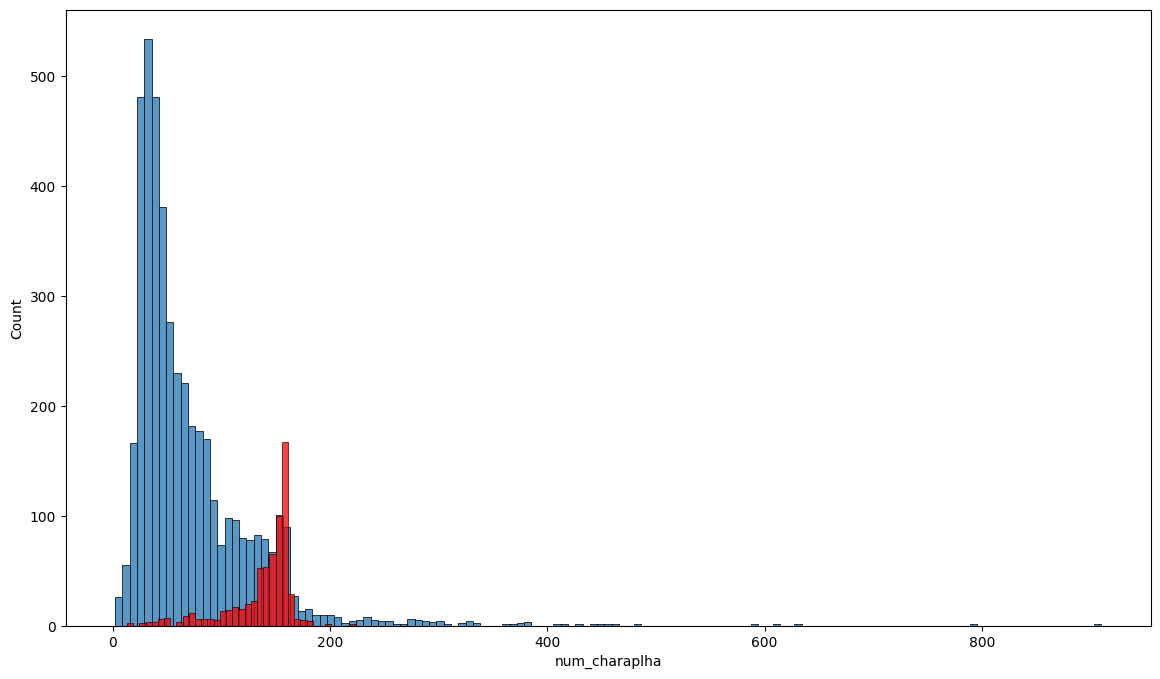

In [240]:
plt.figure(figsize = (14,8))
sns.histplot(data[data['spamORham']==0]['num_charaplha'])
sns.histplot(data[data['spamORham']==1]['num_charaplha'], color = "red")

## PAIR PLOT ANALYSIES

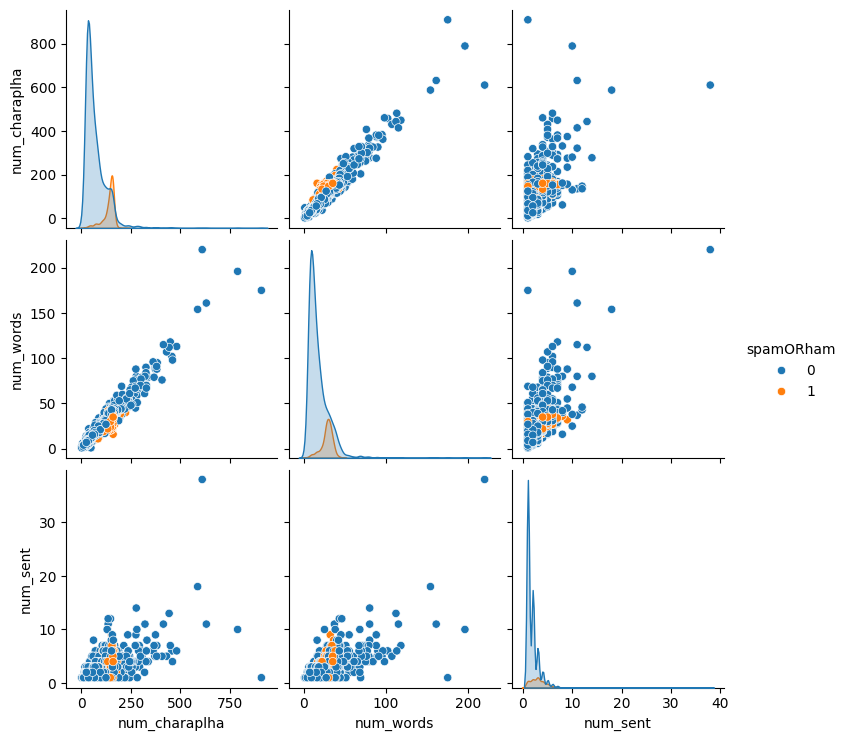

In [243]:
''' using from seaborn {
sns.pairplot(dataset, hue = "co_name")}'''

sns.pairplot(data, hue = 'spamORham' )

## CORELATION HEATMAP

<Axes: >

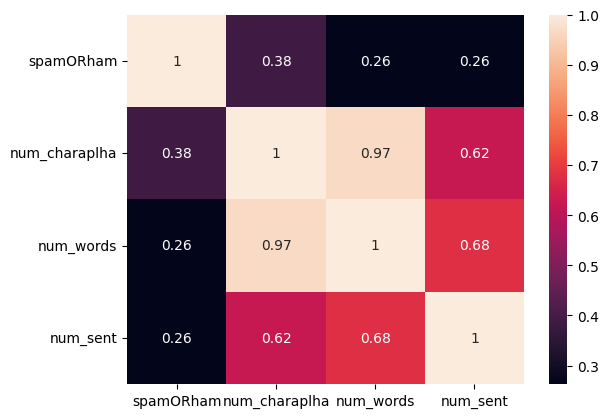

In [246]:
''' sns.heatmap()'''

sns.heatmap(data.corr(numeric_only = True), annot = True)

## DATA PROCESSING

In [249]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [251]:
from nltk.corpus import stopwords  #stopwords.words('english')
  #string.punctuation
from nltk.stem.porter import PorterStemmer # ps = PorterStemmer()   #ps.stem('loving')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string

In [ ]:
''' Lower case - Converting all text to lower case for uniformity. '''
def message_transform(text):
    text =  text.lower()
    text = nltk.word_tokenize(text)  # Tokenize()
    ## Removing the special char
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    ## revoming stop words and punctuations        
    text = y[:]
    y.clear()
    for i in  text:
        if  i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # Stemming - Reducing words to their root form to standardize them.
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [255]:
message_transform("I'm gonna be home soon and.")

'gon na home soon'

In [257]:
data['message_transform'] = data['Message'].apply(message_transform)  

C:\Users\vivek\AppData\Local\Temp\ipykernel_7264\2855026984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message_transform'] = data['Message'].apply(message_transform)


In [259]:

#!pip install WordCloud
data.head()

,spamORham,Message,num_charaplha,num_words,num_sent,message_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## WORLD COLUD ANALYSIS

In [262]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=5, background_color='black')

In [264]:
spam_wc = wc.generate(data[data['spamORham']==1]['message_transform'].str.cat(sep=" "))

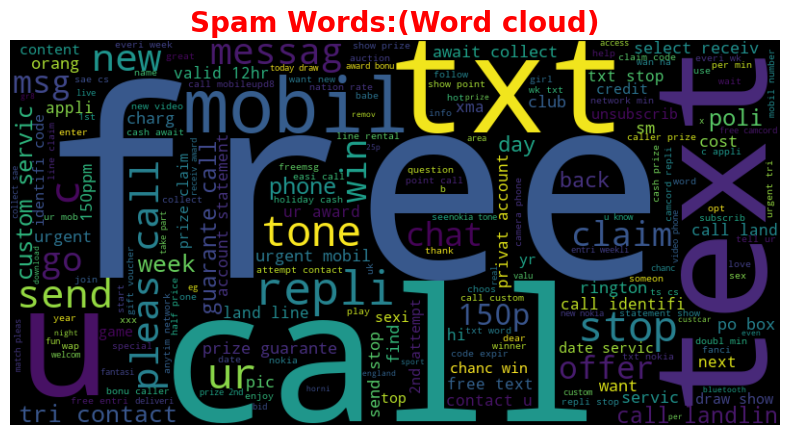

In [266]:
plt.figure(figsize = (10,5))
plt.title("Spam Words:(Word cloud)", fontsize = 20 , fontweight = 'bold', color = "red")
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear', cmap = 'viridis')
plt.show()

In [268]:
ham_wc = wc.generate(data[data['spamORham']==0]['message_transform'].str.cat(sep=" "))

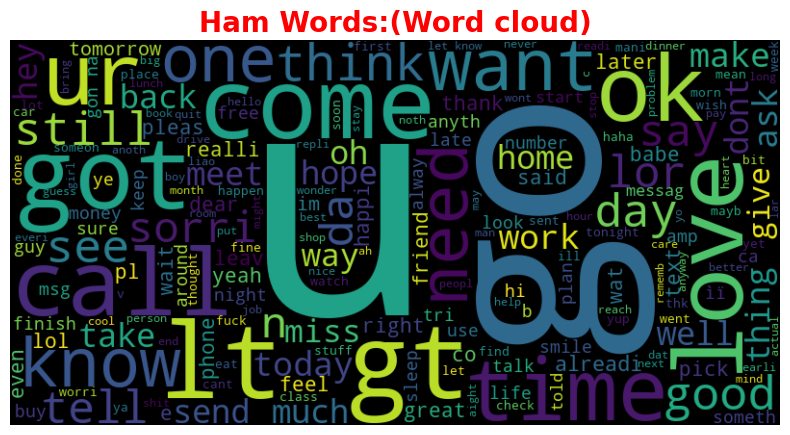

In [270]:
plt.figure(figsize = (10,5))
plt.title("Ham Words:(Word cloud)", fontsize = 20 , fontweight = 'bold', color = "red")
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear', cmap = 'viridis')
plt.show()

## TOP WORD FREQUENCY ANALYSIS 

In [273]:
spam_words = []
for msg in data[data['spamORham']==1]['message_transform'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [275]:
len(spam_words)

9939

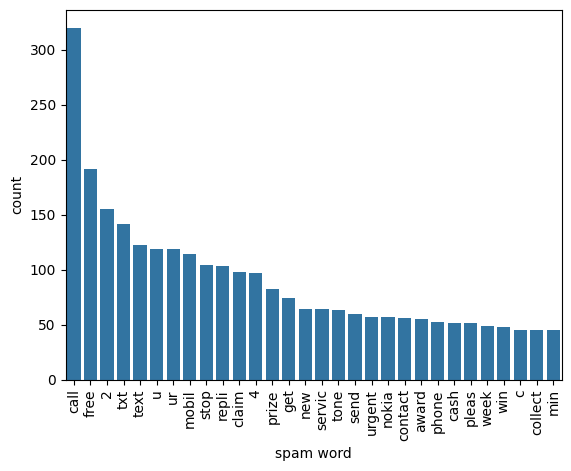

In [277]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_words).most_common(30), columns=['spam word', 'count'])
sns.barplot(x ='spam word', y='count', data = most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [279]:
ham_words = []
for msg in data[data['spamORham']==0]['message_transform'].tolist():
    for word in msg.split():
        ham_words.append(word)
len(ham_words)

35404

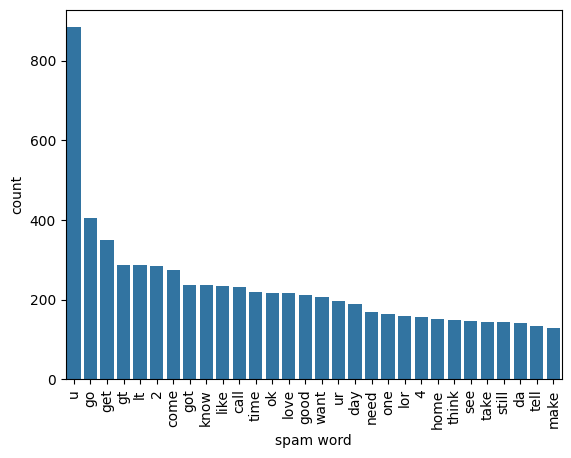

In [281]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_words).most_common(30), columns=['spam word', 'count'])
sns.barplot(x ='spam word', y='count', data = most_common_words)
plt.xticks(rotation='vertical')
plt.show()

## MODEL BUILDING

In [284]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [286]:
x = tfidf.fit_transform(data['message_transform']).toarray()
#scalar = MinMaxScalar()
#x = scalar.fit_transform(x)
x = np.hstack((x,data['num_charaplha'].values.reshape(-1,1)))
x.shape

(5169, 3001)

In [288]:
y = data['spamORham'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [290]:
from sklearn.model_selection import train_test_split 

In [292]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 2)

In [294]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [296]:
gau = GaussianNB()
mnb = MultinomialNB()
ber = BernoulliNB()

In [298]:
gau.fit(X_train, y_train)
y_pred1 = gau.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8897485493230174
[[1224  136]
 [  35  156]]
0.5342465753424658


In [302]:
mnb.fit(X_train,y_train)
y_pred2 = mul.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.935525467440361
[[1360    0]
 [ 100   91]]
1.0


In [304]:
ber.fit(X_train, y_train)
y_pred3 = ber.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9819471308833011
[[1358    2]
 [  26  165]]
0.9880239520958084


## More ML Algorithms To tarain model better

In [307]:
#!pip install xgboost

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [311]:
svc = SVC(kernel = 'sigmoid', gamma = 0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1' ) 
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [313]:
clfs = {           # Dictnory 
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [315]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [317]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.8749194068343005, 0.0)

In [318]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy , current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8749194068343005
Precision -  0.0
For  KN
Accuracy -  0.9258542875564152
Precision -  0.7375
For  NB
Accuracy -  0.935525467440361
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8823529411764706
For  LR
Accuracy -  0.9587362991618311
Precision -  0.9568345323741008
For  RF
Accuracy -  0.973565441650548
Precision -  0.987012987012987


C:\Users\vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9
For  BgC
Accuracy -  0.9587362991618311
Precision -  0.8802395209580839
For  ETC
Accuracy -  0.9780786589297228
Precision -  0.9815950920245399
For  GBDT
Accuracy -  0.9548678272082527
Precision -  0.9115646258503401
For  xgb
Accuracy -  0.9696969696969697
Precision -  0.9390243902439024


In [321]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [323]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.935525,1.000000
5,RF,0.973565,0.987013
8,ETC,0.978079,0.981595
4,LR,0.958736,0.956835
10,xgb,0.969697,0.939024
9,GBDT,0.954868,0.911565
6,AdaBoost,0.959381,0.900000
3,DT,0.943907,0.882353
7,BgC,0.958736,0.880240
1,KN,0.925854,0.737500


In [325]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [327]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.935525
1,RF,Accuracy,0.973565
2,ETC,Accuracy,0.978079
3,LR,Accuracy,0.958736
4,xgb,Accuracy,0.969697
5,GBDT,Accuracy,0.954868
6,AdaBoost,Accuracy,0.959381
7,DT,Accuracy,0.943907
8,BgC,Accuracy,0.958736
9,KN,Accuracy,0.925854


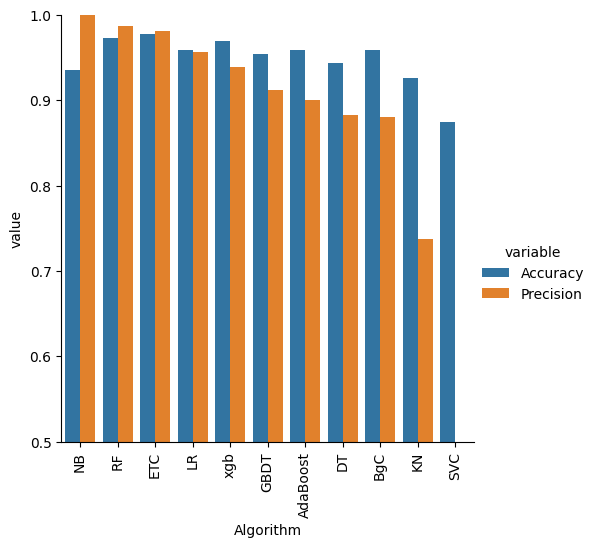

In [329]:
sns.catplot(x = 'Algorithm' , y = 'value',
            hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# model improve
# 1. Change the max_features parameter of TfIdf

In [332]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [334]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [336]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [338]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [340]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [342]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.935525,1.000000,0.935525,1.000000,0.935525,1.000000,0.935525,1.000000
1,RF,0.973565,0.987013,0.973565,0.987013,0.973565,0.987013,0.973565,0.987013
2,ETC,0.978079,0.981595,0.978079,0.981595,0.978079,0.981595,0.978079,0.981595
3,LR,0.958736,0.956835,0.958736,0.956835,0.958736,0.956835,0.958736,0.956835
4,xgb,0.969697,0.939024,0.969697,0.939024,0.969697,0.939024,0.969697,0.939024
5,GBDT,0.954868,0.911565,0.954868,0.911565,0.954868,0.911565,0.954868,0.911565
6,AdaBoost,0.959381,0.900000,0.959381,0.900000,0.959381,0.900000,0.959381,0.900000
7,DT,0.943907,0.882353,0.943907,0.882353,0.943907,0.882353,0.943907,0.882353
8,BgC,0.958736,0.880240,0.958736,0.880240,0.958736,0.880240,0.958736,0.880240
9,KN,0.925854,0.737500,0.925854,0.737500,0.925854,0.737500,0.925854,0.737500


# Voting Classifier

In [345]:
svc = SVC(kernel = 'sigmoid' , gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [347]:
voting = VotingClassifier(estimators = [('svm' , svc), ('nb',mnb),('et', etc)],voting = 'soft')

In [349]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [350]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

Accuracy 0.9303675048355899
Precision 1.0


In [353]:
## Applying stacking
estimators = [('svm', svc), ('nb',mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [355]:
from sklearn.ensemble import StackingClassifier

In [357]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [359]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9438202247191011


In [363]:
import pickle
pickle.dump(tfidf, open('victorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))